# MNIST 손글씨 분류 - 신경망

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11493376/11490434 [==============================] - 9s 1us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

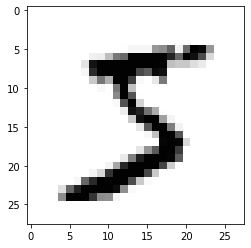

In [4]:
plt.imshow(X_train[0], cmap='Greys');

In [6]:
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [9]:
# X_train, X_test 정규화(0 ~ 1)
X_train = X_train / 255.
X_test = X_test / 255.

In [10]:
# 이미지 차원 변경: 2차원 --> 1차원
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
# y 값의 분포
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [12]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [29]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [14]:
model1 = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dense(256, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_2 (Dense)              (None, 48)                12336     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                490       
Total params: 1,054,082
Trainable params: 1,054,082
Non-trainable params: 0
_________________________________________________________________


In [22]:
model1.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [25]:
mc1 = ModelCheckpoint('mnist_best1.h5py', verbose=2, save_best_only=True)
es1 = EarlyStopping(patience=10)
hist1 = model1.fit(X_train, Y_train, validation_split=0.2,
                            epochs=100, batch_size=300, verbose=0,
                            callbacks=[mc1, es1])


Epoch 00001: val_loss improved from inf to 0.13727, saving model to mnist_best1.h5py
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_best1.h5py\assets

Epoch 00002: val_loss improved from 0.13727 to 0.09759, saving model to mnist_best1.h5py
INFO:tensorflow:Assets written to: mnist_best1.h5py\assets

Epoch 00003: val_loss improved from 0.09759 to 0.08292, saving model to mnist_best1.h5py
INFO:tensorflow:Assets written to: mnist_best1.h5py\assets

Epoch 00004: val_loss improved from 0.08292 to 0.07646, saving model to mnist_best1.h5py
INFO:tensorflow:Assets written to: mnist_best1.h5py\assets

Epoch 00005: val_loss did not improve from 0.07646

Epoch 00006: val_loss did not improve from 0.07646

Epoch 00007: val_loss did not improve from 0.07646

Epoch 00008: val_loss did not improve from 0.07646

Epoch 00009: val_loss did not improve from 0.07646

Epoch 00010: val_loss did not improve from 0.07646

Epoch 00011: v

In [27]:
best_model1 = load_model('mnist_best1.h5py')
best_model1.evaluate(X_test, Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07497734853550792, 0.9768]

- Dropout 추가

In [30]:
model2 = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 48)                12336     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                490       
Total params: 1,054,082
Trainable params: 1,054,082
Non-trainable params: 0
____________________________________________

In [31]:
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [32]:
mc2 = ModelCheckpoint('mnist_best2.h5py', verbose=2, save_best_only=True)
es2 = EarlyStopping(patience=10)
hist2 = model2.fit(X_train, Y_train, validation_split=0.2,
                            epochs=100, batch_size=300, verbose=0,
                            callbacks=[mc2, es2])


Epoch 00001: val_loss improved from inf to 0.13367, saving model to mnist_best2.h5py
INFO:tensorflow:Assets written to: mnist_best2.h5py\assets

Epoch 00002: val_loss improved from 0.13367 to 0.10350, saving model to mnist_best2.h5py
INFO:tensorflow:Assets written to: mnist_best2.h5py\assets

Epoch 00003: val_loss improved from 0.10350 to 0.08388, saving model to mnist_best2.h5py
INFO:tensorflow:Assets written to: mnist_best2.h5py\assets

Epoch 00004: val_loss improved from 0.08388 to 0.08360, saving model to mnist_best2.h5py
INFO:tensorflow:Assets written to: mnist_best2.h5py\assets

Epoch 00005: val_loss improved from 0.08360 to 0.08248, saving model to mnist_best2.h5py
INFO:tensorflow:Assets written to: mnist_best2.h5py\assets

Epoch 00006: val_loss did not improve from 0.08248

Epoch 00007: val_loss did not improve from 0.08248

Epoch 00008: val_loss improved from 0.08248 to 0.08141, saving model to mnist_best2.h5py
INFO:tensorflow:Assets written to: mnist_best2.h5py\assets

Epoch

In [33]:
best_model2 = load_model('mnist_best2.h5py')
best_model2.evaluate(X_test, Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06627081649650936, 0.9809]

- 훈련과정 시각화

In [34]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)

y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2) + 1)

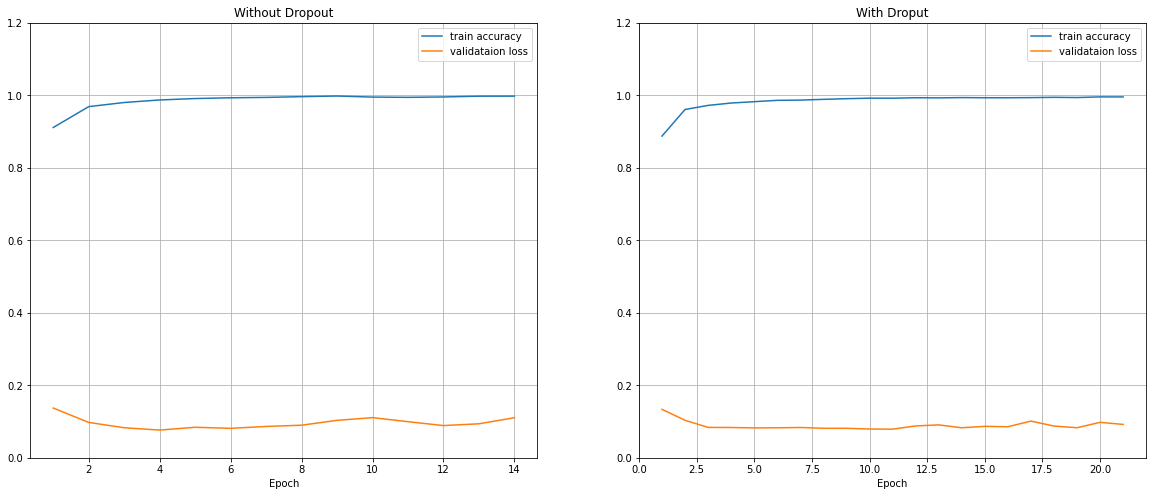

In [35]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.plot(xs1, y_acc1, label='train accuracy')
plt.plot(xs1, y_vloss1, label='validataion loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch'), plt.title("Without Dropout")

plt.subplot(122)
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validataion loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch'), plt.title("With Droput")

plt.show()